In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd
import pydot as pt 
import datetime
from sklearn.model_selection import train_test_split

In [55]:
data = pd.read_csv("digit_pixels.csv")
test = pd.read_csv("test.csv")


In [56]:
print(data.shape,test.shape)

(42000, 785) (28000, 784)


In [8]:
data .head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X = data.iloc[:, 1:785]
y = data.iloc[:, 0]
x_test = test.iloc[:,0:784]

In [58]:
x_train,x_val , y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=1212)

In [59]:
x_train.shape

(33600, 784)

In [60]:
y_train.shape

(33600,)

In [61]:
x_val.shape

(8400, 784)

In [62]:
y_val.shape

(8400,)

In [63]:
x_train_re = x_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_val_re = x_val.to_numpy().reshape(8400, 28, 28)
y_val_re = y_val.values
x_test_re = x_test.to_numpy().reshape(28000,28,28)

In [64]:
x_train_re.shape

(33600, 28, 28)

In [65]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

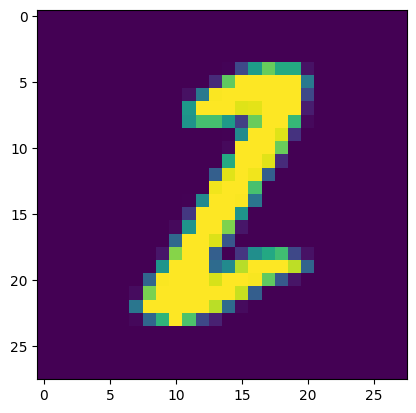

In [66]:
plt.imshow(x_train_re[0])
plt.show()

In [67]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_val_with_chanels = x_val_re.reshape(
    x_val_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_channels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [68]:
print(x_train_with_chanels.shape,
x_val_with_chanels.shape,
x_test_with_channels.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (28000, 28, 28, 1)


In [69]:
x_train_normalized = x_train_with_chanels / 255
x_val_normalized = x_val_with_chanels / 255
x_test_normalized = x_test_with_channels/255
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [70]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\Users\Prajwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [73]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_val_normalized, y_val_re),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8098 - loss: 0.6114 - val_accuracy: 0.9725 - val_loss: 0.0914
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9699 - loss: 0.0984 - val_accuracy: 0.9795 - val_loss: 0.0686
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9805 - loss: 0.0650 - val_accuracy: 0.9846 - val_loss: 0.0539
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9844 - loss: 0.0527 - val_accuracy: 0.9873 - val_loss: 0.0446
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9851 - val_loss: 0.0499
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9874 - val_loss: 0.0432
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9911 - loss: 0.0248 - val_accuracy: 0.9860 - val_loss: 0.0493
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9921 - loss: 0.0240 - 

In [74]:
train_loss,train_accuracy = model.evaluate(x_train_normalized,y_train_re)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9958 - loss: 0.0120


In [75]:
val_loss,val_accuracy = model.evaluate(x_val_normalized,y_val_re)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0494


In [105]:
model_name = 'cnn_adam.h5'
model.save(model_name,save_format ='h5')

In [106]:
model1 = tf.keras.models.load_model(model_name)

In [ ]:
predictions = model.predict(x_test_normalized)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [114]:
predictions.shape

(28000, 10)

In [109]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,5.796093e-12,3.662072e-10,9.999994e-01,6.973816e-08,1.657495e-08,3.521921e-14,1.860246e-13,5.882202e-09,4.225928e-07,1.772597e-12
1,9.999715e-01,1.829355e-09,2.074732e-11,5.522177e-09,4.598975e-11,1.213733e-06,2.666477e-05,1.531741e-08,4.487117e-09,5.704123e-07
2,1.715501e-10,7.132780e-09,4.168617e-08,1.454642e-05,1.103338e-04,2.563268e-08,7.376299e-13,5.701521e-08,2.153381e-04,9.996597e-01
3,6.004719e-01,2.857784e-10,8.166276e-07,6.010590e-05,6.527318e-08,2.712299e-06,9.605625e-08,1.314910e-08,3.910230e-05,3.994251e-01
4,5.647096e-11,2.230082e-10,1.821485e-09,9.999840e-01,3.203587e-16,6.356778e-10,1.306264e-12,1.340486e-09,1.601737e-05,1.201536e-11
...,...,...,...,...,...,...,...,...,...,...
27995,3.518839e-14,1.029961e-16,2.478881e-13,2.261181e-07,1.156254e-07,1.225136e-09,3.139490e-18,7.423264e-12,5.325310e-09,9.999996e-01
27996,9.472078e-10,1.083702e-07,7.742285e-08,1.028228e-08,1.270026e-08,5.815140e-08,2.882506e-15,9.999937e-01,6.378840e-12,6.025065e-06
27997,4.785214e-19,4.495988e-15,3.179106e-17,1.000000e+00,2.036538e-21,2.573960e-12,3.902763e-19,1.817926e-11,7.330555e-13,6.189726e-16
27998,5.565258e-10,2.545378e-07,1.585237e-09,1.214728e-05,2.931311e-05,3.773724e-06,1.956884e-12,4.527618e-06,1.002769e-08,9.999499e-01


In [110]:
predictions = np.argmax(predictions,axis =1)
pd.DataFrame(predictions)

,0
0,2
1,0
2,9
3,0
4,3
...,...
27995,9
27996,7
27997,3
27998,9


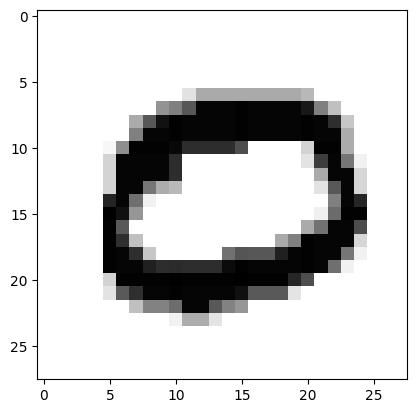

In [112]:
plt.imshow(x_test_normalized[1].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

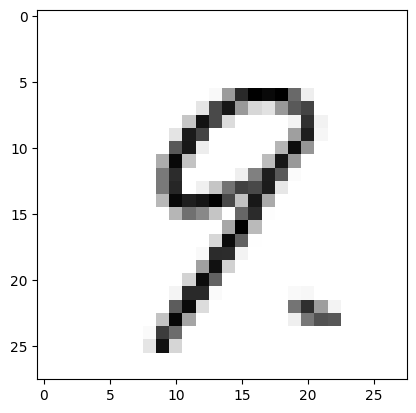

In [104]:
plt.imshow(x_test_normalized[2].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()